### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [1]:
#!pip install dice-ml

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import dice_ml
from dice_ml import Dice
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_diabetes = load_diabetes(as_frame=True,)
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

model = RandomForestClassifier()
model.fit(X, y)

outcome_name = "target"
continuous_features_diabetes = df_diabetes.frame.drop(outcome_name, axis=1).columns.tolist()

d_diabetes = dice_ml.Data(dataframe=df_diabetes.frame,
                      continuous_features=continuous_features_diabetes,
                      outcome_name=outcome_name)

# We provide the type of model as a parameter (model_type)
m_diabetes = dice_ml.Model(model=model, backend="sklearn", model_type='classifier')
exp_genetic_diabetes = Dice(d_diabetes, m_diabetes, method="genetic")

query_instances_diabetes = X[2:3]
genetic_diabetes = exp_genetic_diabetes.generate_counterfactuals(query_instances_diabetes, total_CFs=7, desired_class=2)
genetic_diabetes.visualize_as_dataframe()

100%|██████████| 1/1 [20:52<00:00, 1252.10s/it]

Query instance (original outcome : 141.0)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.085299,0.05068,0.044451,-0.00567,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.02593,141.0



Diverse Counterfactual set (new outcome: 37.0)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.030277,0.022883,0.025063,-0.106430,-0.086844,-0.114084,0.083994,-0.001430,-0.055663,-0.051371,37.0
0,0.046470,0.044592,-0.059549,-0.023070,-0.044921,-0.108135,0.075159,0.071081,-0.070236,-0.006869,37.0
0,0.072612,0.013595,-0.057667,-0.079632,-0.085026,-0.110109,0.104804,-0.002390,0.039948,0.012688,37.0
0,-0.030089,0.007688,-0.061441,-0.032775,-0.064161,-0.104763,-0.021629,0.095457,-0.053327,0.012346,37.0
0,-0.046430,0.041805,-0.074554,-0.006298,0.037630,-0.109012,0.065110,-0.035519,0.000157,-0.026658,37.0
0,0.005925,-0.041052,-0.056224,-0.036128,-0.042156,-0.104080,0.044363,0.108560,0.034967,0.031581,37.0
0,0.024285,-0.039688,-0.045471,-0.106557,-0.085014,-0.109569,0.082355,-0.009176,0.002733,0.043765,37.0


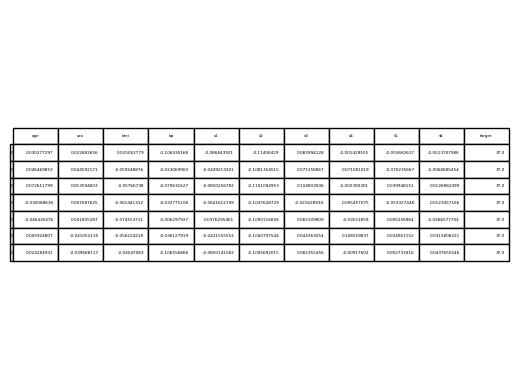

In [16]:
from pandas.plotting import table # EDIT: see deprecation warnings below
import matplotlib.pyplot as plt

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax, genetic_diabetes.cf_examples_list[0].final_cfs_df, loc='center')  # where df is your data frame
plt.savefig('cfexplainer_explanation.png',dpi='figure', format='png', orientation="landscape")